# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [3]:
df.head(10)

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
5,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
6,0.0,0.437818,-1.119883,-1.336823,0.502320,-1.717515,1.017067,0.215619,-0.461200,0.323671,0.173626,0.411898,0.370525,0.798260,0.671369,0.385910,0.515522,0.479110,0.029058
7,0.0,0.571656,0.205696,0.425950,0.578514,0.927399,-1.101478,0.116555,1.549753,0.174421,0.223450,0.523164,0.289889,0.491710,0.334593,0.514246,0.268207,0.315795,0.125728
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
9,0.0,1.001869,-0.471788,0.555614,1.233368,1.255548,-1.052491,0.437615,-1.333052,0.326858,-0.111678,1.435708,0.755201,0.466779,0.454541,1.446331,0.592259,1.325197,0.083014


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [5]:
# Note: I am using smaller Training and Testing sets for efficiency

N_Train=10000
M_Train=len(df['signal'])-10000

Train_Sample=df[:N_Train]
Test_Sample=df[M_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [6]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

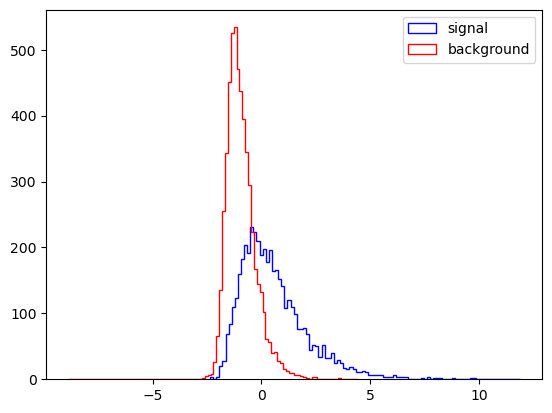

In [7]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

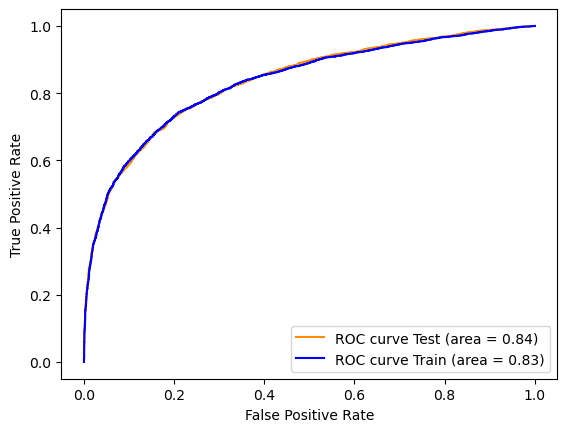

In [8]:
import sklearn.metrics as MET
from sklearn.metrics import roc_curve, auc

# Create fpr, tpr, auc for Test data
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)

# Create fpr, tpr, auc for Training data
fpr_1, tpr_1, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves against eachother
plt.plot(fpr,tpr,color='darkorange',label='ROC curve Test (area = %0.2f)' % roc_auc)
plt.plot(fpr_1,tpr_1,color='blue',label='ROC curve Train (area = %0.2f)' % roc_auc_1)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

I do not see any bias.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

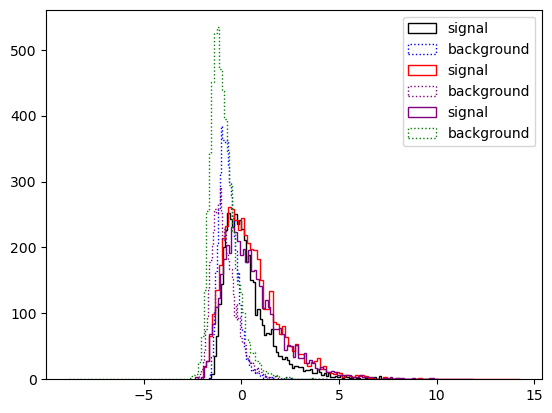

In [9]:
# Creates the Raw Names and Feature Names
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

# Create an x and y set for training based on the Raw Names
df_RAW_X=Train_Sample[RawNames[1:]]
df_RAW_Y=Train_Sample['signal']

#Create an x and y set for training based on the Feature Names
df_FEAT_X=Train_Sample[FeatureNames[1:]]
df_FEAT_Y=Train_Sample['signal']

plt.figure()

# Train and plot for Raw Names
Fisher.fit(df_RAW_X,df_RAW_Y)
plt.hist(Fisher.decision_function(Test_sig[RawNames[1:]]),bins=100,histtype="step", color="black", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[RawNames[1:]]),bins=100,histtype="step", color="blue", label="background",stacked=True, linestyle='dotted')
plt.legend(loc='upper right')

# Train and plot for Feature Names
Fisher.fit(df_FEAT_X,df_FEAT_Y)
plt.hist(Fisher.decision_function(Test_sig[FeatureNames[1:]]),bins=100,histtype="step", color="red", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[FeatureNames[1:]]),bins=100,histtype="step", color="purple", label="background",stacked=True, linestyle='dotted')
plt.legend(loc='upper right')

# Train and plot for both Raw and Feature Names
Fisher.fit(X_Train,y_Train)
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="purple", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="green", label="background",stacked=True, linestyle='dotted')
plt.legend(loc='upper right')

plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [10]:
# Part a
# Linear Discriminant Analysis
import sklearn.discriminant_analysis as DA

# Support vector machine: Classification
from sklearn import svm

# Stochastic Gradiant Descent: Classification
from sklearn.linear_model import SGDClassifier

In [11]:
# Part b

def classifier(clf, df_RAW_X, df_RAW_Y, df_FEAT_X, df_FEAT_Y, X_Train, y_Train, test_sig, Test_bkg):
    plt.figure()

# Train and plot for Raw Names
    clf.fit(df_RAW_X,df_RAW_Y)
    plt.hist(clf.decision_function(Test_sig[RawNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.hist(clf.decision_function(Test_bkg[RawNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')

# Train and plot for Feature Names
    clf.fit(df_FEAT_X,df_FEAT_Y)
    plt.hist(clf.decision_function(Test_sig[FeatureNames[1:]]),bins=100,histtype="step", color="black", label="signal",stacked=True)
    plt.hist(clf.decision_function(Test_bkg[FeatureNames[1:]]),bins=100,histtype="step", color="orange", label="background",stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')

# Train and plot for both Raw and Feature Names
    clf.fit(X_Train,y_Train)
    plt.hist(clf.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="green", label="signal",stacked=True)
    plt.hist(clf.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="purple", label="background",stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')

    plt.show()


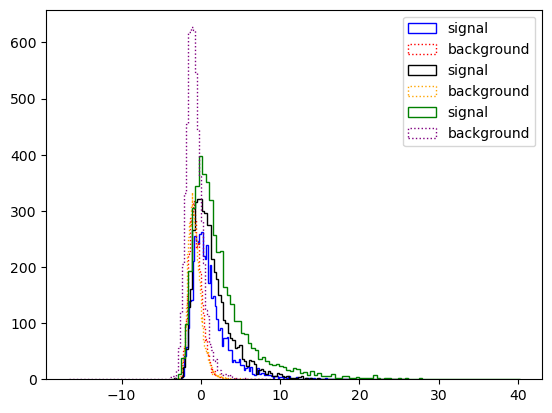

In [12]:
# Stochastic Gradiant Descent: Classification 

clf = SGDClassifier(loss="hinge", penalty="l2")

classifier(clf, df_RAW_X, df_RAW_Y, df_FEAT_X, df_FEAT_Y, X_Train, y_Train, Test_sig, Test_bkg)

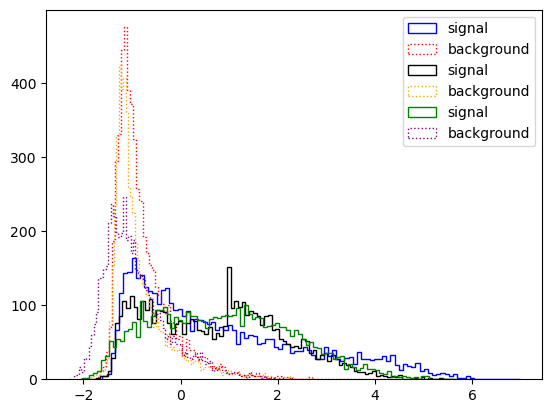

In [13]:
# Support Vector Machine: Classification
clf = svm.SVC()

classifier(clf, df_RAW_X, df_RAW_Y, df_FEAT_X, df_FEAT_Y, X_Train, y_Train, Test_sig, Test_bkg)

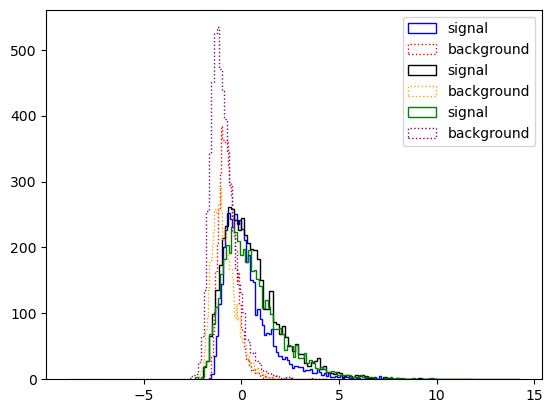

In [14]:
# Linear Discriminant Analysis
Fisher=DA.LinearDiscriminantAnalysis()

classifier(Fisher, df_RAW_X, df_RAW_Y, df_FEAT_X, df_FEAT_Y, X_Train, y_Train, Test_sig, Test_bkg)

In [15]:
# Part c

scenarios = { "1": (10,100), 
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
    
def compare_significance(df_sig, df_bkg,
                         TPR,FPR, bins_sig,
                         scenarios,bins=100,log=False, ret_xc=False, sel=1):
    
    max_sigs=dict()
    table=list()
    sigs_maxi=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        sigs_maxi.append(sig[max_i])
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'max sig','x_c',"bin i"])))
    return sigs_maxi

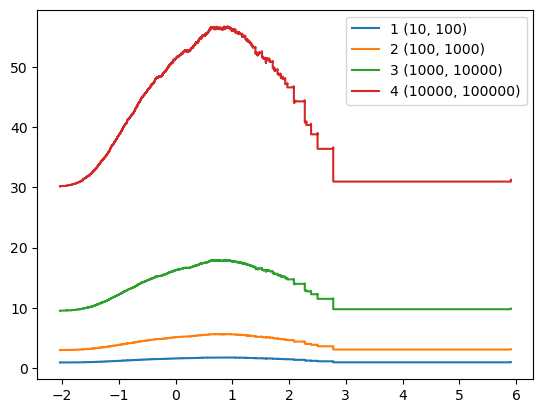

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',max sig,x_c,bin i
1,10,100,0.475142,0.0227189,4.75142,2.27189,1.79288,0.914586,217
2,100,1000,0.475142,0.0227189,47.5142,22.7189,5.6696,0.914586,217
3,1000,10000,0.475142,0.0227189,475.142,227.189,17.9288,0.914586,217
4,10000,100000,0.475142,0.0227189,4751.42,2271.89,56.696,0.914586,217


In [16]:
from sklearn.metrics import roc_curve, auc

clf = svm.SVC()
clf.fit(X_Train,y_Train) # fit data to SVM

fpr, tpr, _ = roc_curve(y_Test, clf.decision_function(X_Test)) # Find fpr and tpr using sklearn

_=compare_significance(Test_sig, Test_bkg, tpr[1:], fpr[1:], _, scenarios)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

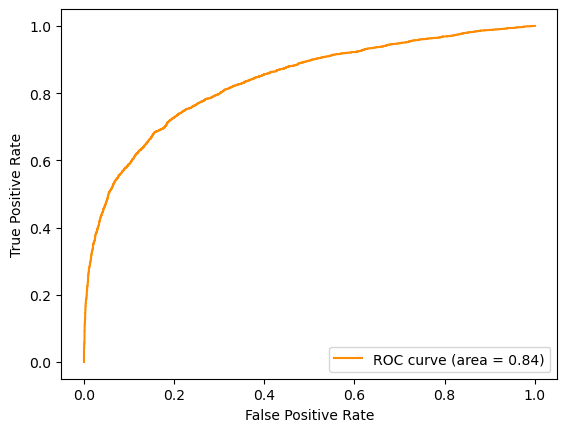

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [18]:
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, f1_score

clf = svm.SVC()
clf.fit(X_Train,y_Train) # fit data to SVM

SVC()

In [19]:
predictions=list()
for x in clf.decision_function(X_Test): predictions.append(1 if x>0 else 0)

In [20]:
def compare_significance(df_sig, df_bkg,
                         TPR,FPR, bins_sig,
                         scenarios, bins=100,log=False, ):
    
    max_sigs=dict()
    table=list()
    sigs_maxi=list()

    # Create a table of 1s and 0s to represent the predictions made by the ML model
    predictions=list()
    for x in clf.decision_function(X_Test): predictions.append(1 if x>0 else 0)
    
    precision = precision_score(y_Test, predictions) # Caluclate Precision

    accuracy = accuracy_score(y_Test, predictions) # Calculate Accuracy

    recall = recall_score(y_Test, predictions) # Calculate Recall Score

    f1 = f1_score(y_Test, predictions) # Calculate F1 Score
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        sigs_maxi.append(sig[max_i])
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i, 
                     precision, accuracy, recall, f1)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'max sig','x_c',"bin i",
                                           "Precision", 'Accuracy', 'Recall', 'F1 Score'])))
    return sigs_maxi

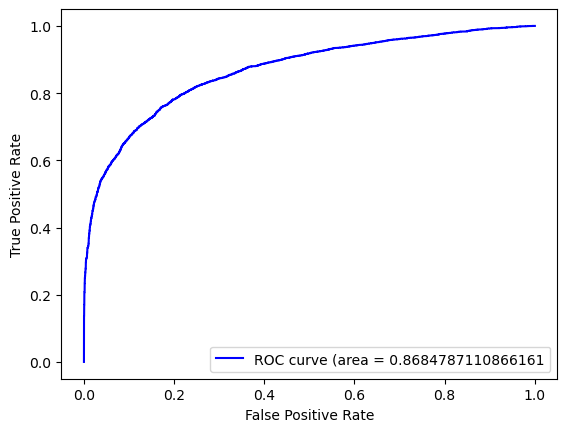

In [21]:
fpr, tpr, _ = roc_curve(y_Test, clf.decision_function(X_Test)) # Find fpr and tpr using sklearn

AUC = auc(fpr, tpr) # Finds the AUC for the ROC curve

# Plots the ROC Curve
plt.plot(fpr,tpr,color='blue',label=f'ROC curve (area = {AUC}')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

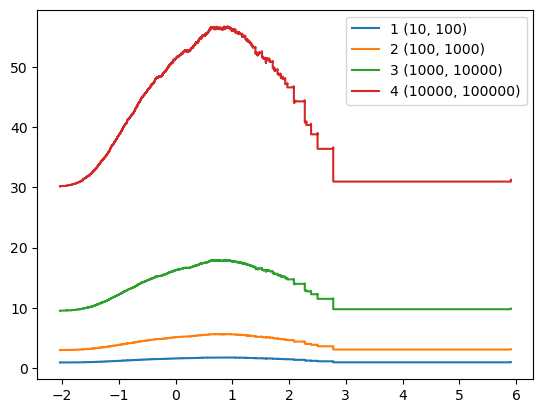

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',max sig,x_c,bin i,Precision,Accuracy,Recall,F1 Score
1,10,100,0.475142,0.0227189,4.75142,2.27189,1.79288,0.914586,217,0.843462,0.7946,0.677933,0.751692
2,100,1000,0.475142,0.0227189,47.5142,22.7189,5.6696,0.914586,217,0.843462,0.7946,0.677933,0.751692
3,1000,10000,0.475142,0.0227189,475.142,227.189,17.9288,0.914586,217,0.843462,0.7946,0.677933,0.751692
4,10000,100000,0.475142,0.0227189,4751.42,2271.89,56.696,0.914586,217,0.843462,0.7946,0.677933,0.751692


In [22]:
_=compare_significance(Test_sig, Test_bkg, tpr[1:], fpr[1:], _, scenarios)